In [1]:
# pip install scikit-learn numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [3]:
dataset = "/kaggle/input/dating/updated_dating.csv"
df = pd.read_csv(dataset)
print(df.shape)
print(df.head())

(7040, 12)
   Unnamed: 0  gender   age   income  career  dec  attr  sinc  intel  fun  \
0           0       0  21.0  69487.0  lawyer    1   6.0   9.0    7.0  7.0   
1           1       0  21.0  69487.0  lawyer    1   7.0   8.0    7.0  8.0   
2           2       0  21.0  69487.0  lawyer    1   5.0   8.0    9.0  8.0   
3           3       0  21.0  69487.0  lawyer    1   7.0   6.0    8.0  7.0   
4           4       0  21.0  69487.0  lawyer    1   5.0   6.0    7.0  7.0   

   amb  like  
0  6.0   7.0  
1  5.0   7.0  
2  5.0   7.0  
3  6.0   7.0  
4  6.0   6.0  


In [4]:
xf = ['gender', 'age', 'income', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'career']
df_encoded = pd.get_dummies(df[xf], columns=['career'])

In [5]:
X = df_encoded.values
y = df['dec'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7336647727272727


In [10]:
xf = ['attr', 'fun']
X = df[xf].values
y = df['dec'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.0, gamma='scale', degree=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7492897727272727


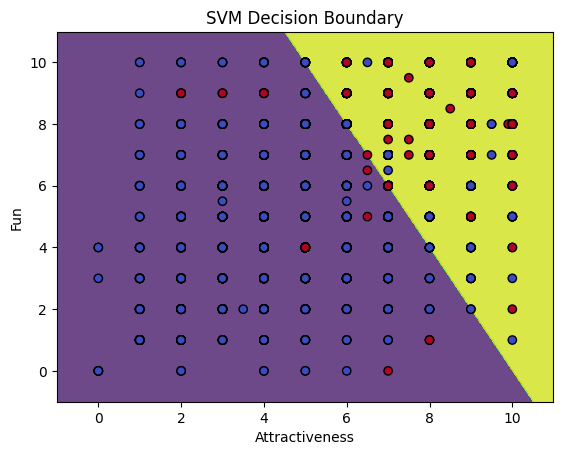

In [14]:
h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

plt.xlabel('Attractiveness')
plt.ylabel('Fun')
plt.title('SVM Decision Boundary')
plt.show()